# Influence of Kernel size parameter 

This notebook intends to show the influence of Kernel Size on Mask Generation. 

The stroma mask remains constant, while the cancer mask is computed using kernel sizes of varying sizes for the convolutional sum. 

Larger kernel sizes produce smoother and more generalized contours, while smaller kernels result in more fine-grained and detailed masks, potentially capturing localized structures. 


These parameters can also be adjusted to define regions with varying levels of granularity—ranging from highly detailed, cell-level distinctions to broader, smoother masks.

useful imports

In [1]:
%load_ext autoreload

import os 
import sys
import time
import logging
import re
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from natsort import natsorted

import cv2
import numpy as np
from PIL import Image
import tifffile as tiff
import copy 

sys.path.append(os.path.dirname(os.getcwd()))
from gridgen import get_arrays as ga
from gridgen import contours 
from gridgen import get_masks

***Kernel on CosMx data***

To remember, CosMx data has: 

* Resolution: 1 px = 125 nm = 0.125 um  /  1 um = 8 px

* N Transcripts -> 999 + system and negative controls


In [2]:
# transcripts for CosMx Cancer
target_tum =  ['EPCAM',  'KRT19', 'KRT8', 'KRT18','KRT17','CEACAM6','SPINK1', 'CD24', 'S100A6','RPL37','S100P',]  

Use just one file for displaying purposes

In [3]:
cosmx_path_s0 =  '../../cosmx_data/S0/S0/20230628_151317_S4/AnalysisResults/iz38iruwno'

folder_names_s0 = [folder_name for folder_name in os.listdir(cosmx_path_s0) if
                os.path.isdir(os.path.join(cosmx_path_s0, folder_name))]

target_files_s0 = [
    os.path.join(cosmx_path_s0, folder, file)
    for folder in os.listdir(cosmx_path_s0)
    if os.path.isdir(os.path.join(cosmx_path_s0, folder))
    for file in os.listdir(os.path.join(cosmx_path_s0, folder))
    if '__target_call_coord.csv' in file
]


files_names = natsorted(target_files_s0)
file_csv = files_names[0]   # 5

df_total = pd.read_csv(file_csv)

df_total['target'].value_counts()
df_total = pd.read_csv(file_csv)
df_total['X'] = (round(df_total['x'])).astype(int)
df_total['Y'] = (round(df_total['y'])).astype(int)
n_genes = len(df_total['target'].unique())
height = max(df_total['X'] + 1)
width = max(df_total['Y'] + 1)

# this makes the sparse df to an array with the spatial information 
target_dict_total = {target: index for index, target in enumerate(df_total['target'].unique())}
array_total = ga.transform_df_to_array(df = df_total, target_dict=target_dict_total, array_shape = (height, width,len(target_dict_total))).astype(np.int8)

# creating subsets 
df_subset_tum, array_subset_tum, target_indices_subset_tum = ga.get_subset_arrays(df_total, array_total,target_dict_total,
                                                                     target_list=target_tum, target_col = 'target')


Define the parameters for the 3 kernels

In [6]:
min_area_th_tum =  1000 
min_area_th_empty = 2000 

parameters = {
    'i': {'density_th_tum':40, 'kernel_size_tum':80, 'density_th_empty':140, 'kernel_size_empty':80},
    'ii':{'density_th_tum':50, 'kernel_size_tum':100, 'density_th_empty':50, 'kernel_size_empty':100},
    'iii':{'density_th_tum':30, 'kernel_size_tum':60, 'density_th_empty':30, 'kernel_size_empty':60},}


2025-06-12 00:43:51,585 - gridgen.contours.tum - INFO - Initialized GetContour


get_conv_sum took 0.5010 seconds


2025-06-12 00:43:52,408 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 38
2025-06-12 00:43:52,409 - gridgen.contours.empty - INFO - Initialized GetContour


contours_from_sum took 0.3213 seconds
get_conv_sum took 8.8959 seconds


2025-06-12 00:44:09,846 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 35


contours_from_sum took 8.5411 seconds


2025-06-12 00:44:12,853 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:44:12,866 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:44:16,425 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/masks_stroma_cancer.png


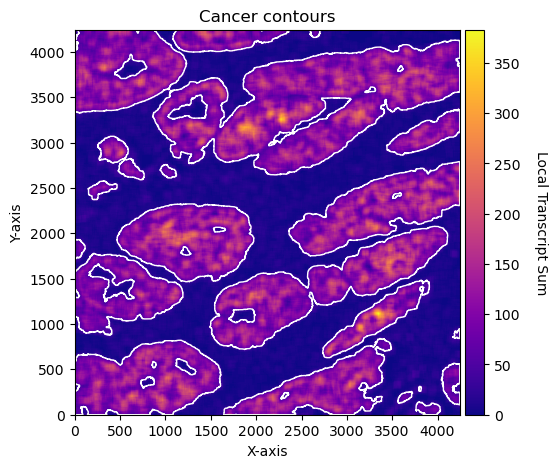

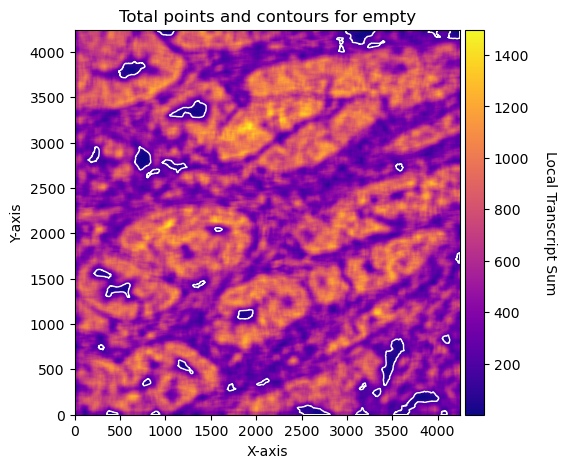

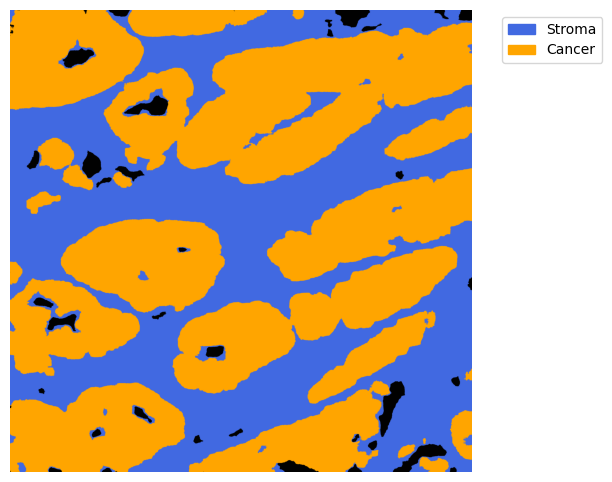

2025-06-12 00:44:18,948 - gridgen.contours.tum - INFO - Initialized GetContour


get_conv_sum took 0.5078 seconds


2025-06-12 00:44:19,776 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 30
2025-06-12 00:44:19,776 - gridgen.contours.empty - INFO - Initialized GetContour


contours_from_sum took 0.3194 seconds
get_conv_sum took 8.7913 seconds


2025-06-12 00:44:37,111 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 6


contours_from_sum took 8.5432 seconds


2025-06-12 00:44:40,094 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:44:40,105 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:44:43,596 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/masks_stroma_cancer.png


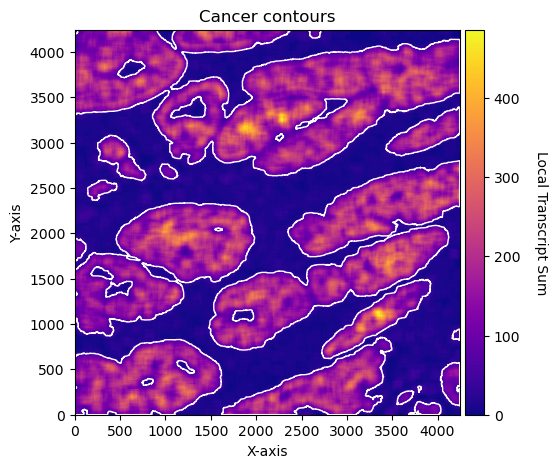

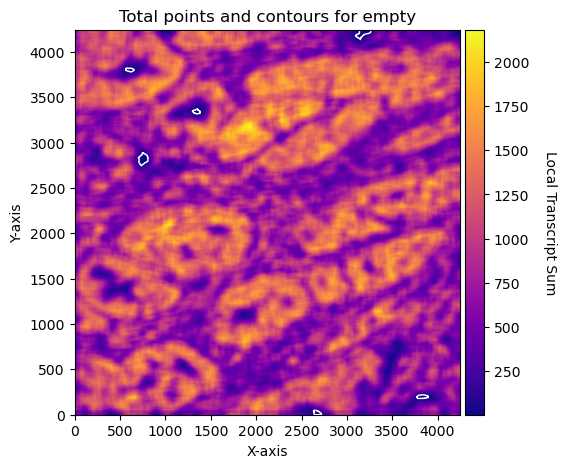

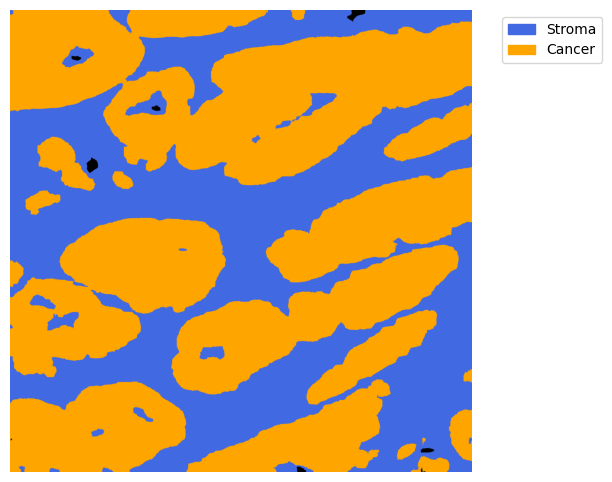

2025-06-12 00:44:46,109 - gridgen.contours.tum - INFO - Initialized GetContour


get_conv_sum took 0.5043 seconds


2025-06-12 00:44:46,953 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 79
2025-06-12 00:44:46,955 - gridgen.contours.empty - INFO - Initialized GetContour


contours_from_sum took 0.3402 seconds
get_conv_sum took 8.9319 seconds


2025-06-12 00:45:04,579 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 13


contours_from_sum took 8.6921 seconds


2025-06-12 00:45:07,623 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:45:07,637 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:45:11,536 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/masks_stroma_cancer.png


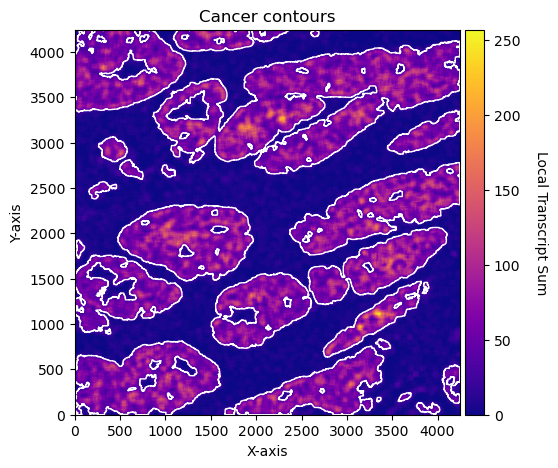

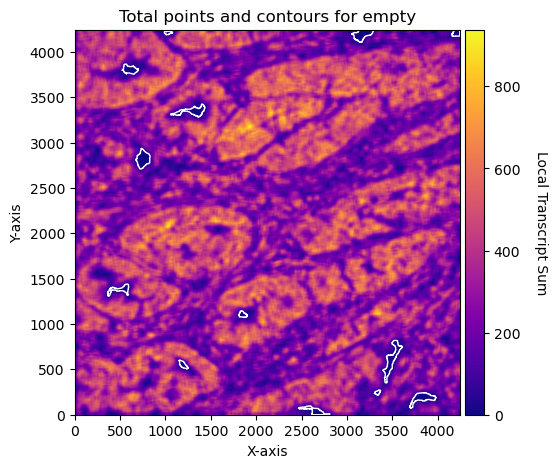

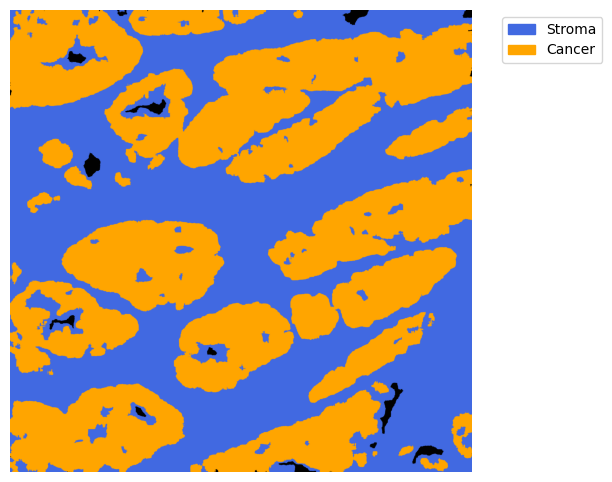

In [9]:
for name, i in parameters.items():
    density_th_tum = i['density_th_tum']
    kernel_size_tum = i['kernel_size_tum']
    density_th_empty = i['density_th_empty']
    kernel_size_empty = i['kernel_size_empty']
    
    # obtain contours 
    CTum = contours.ConvolutionContours(array_subset_tum, contour_name='tum')
    CTum.get_conv_sum(kernel_size=kernel_size_tum, kernel_shape='square')
    CTum.contours_from_sum(density_threshold = density_th_tum,
                           min_area_threshold = min_area_th_tum , directionality = 'higher')
    
    CEmpty = contours.ConvolutionContours(array_total, contour_name='empty')
    CEmpty.get_conv_sum(kernel_size=kernel_size_empty, kernel_shape='square')
    CEmpty.contours_from_sum(density_threshold = density_th_empty,
                           min_area_threshold = min_area_th_empty, directionality = 'lower') # attention that directionality is lower here 
        
    # Cancer contours
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    CTum.plot_conv_sum(cmap='plasma', c_countour='white', ax=ax1)
    ax1.set_title('Cancer contours')
    fig1.savefig(f'results/kernel/cancer_contours{i}.png', dpi=300, bbox_inches='tight')

    # Empty points and contours
    fig2, ax2 = plt.subplots(figsize=(7, 5))
    CEmpty.plot_conv_sum(cmap='plasma', c_countour='white', ax=ax2)
    ax2.set_title('Total points and contours for empty')
    fig2.savefig(f'results/kernel/empty_contours{i}.png', dpi=300, bbox_inches='tight')

    
    #### obtain masks
    GM = get_masks.GetMasks(image_shape = (height, width))
    
    mask_empty = GM.create_mask(CEmpty.contours)
    mask_tum = GM.create_mask(CTum.contours)
    mask_stroma = GM.subtract_masks(np.ones((height, width), dtype=np.uint8), mask_tum, mask_empty)          
    mask_stroma = GM.filter_binary_mask_by_area(mask_stroma, min_area=700)
    
    GM.plot_masks(masks=[mask_stroma, mask_tum], mask_names=['Stroma', 'Cancer'],
                  background_color=(1, 1, 1), mask_colors={'Stroma': (65, 105, 225), 'Cancer': (255, 165, 0)},
                  path=f"results/kernel/", show=True, ax=None, figsize=(6, 6))

***Xenium***

How the kernel affects Xenium data? 

In [10]:
target_tum = ['EPCAM', 'SMIM22','CLDN3', 'KRT18','LGALS4', 'KRT8', 'ELF3','TSPAN8', 'STMN1', 'CD47', 'MYC', 'LGALS3'] 

In [11]:
file_csv =  '../../xenium_data/HLA/GD_TMA1_S3/fov_filtered/TMA1_Selection13_filtered.csv'

df_total = pd.read_csv(file_csv)
df_total = df_total[['x_location', 'y_location', 'feature_name']]
df_total = df_total.rename(columns={'feature_name': 'target'})
df_total = df_total[~df_total['target'].str.contains('System|egative')]
df_total['X'] = df_total['x_location'] - min(df_total['x_location'])
df_total['Y'] = df_total['y_location'] - min(df_total['y_location'])

n_genes = len(df_total['target'].unique())
height = int(max(df_total['X'])) + 1
width = int(max(df_total['Y'])) + 1
target_dict_total = {target: index for index, target in enumerate(df_total['target'].unique())}
array_total = ga.transform_df_to_array(df = df_total, target_dict=target_dict_total, array_shape = (height, width,len(target_dict_total))).astype(np.int8)

# creating subsets 
df_subset_tum, array_subset_tum, target_indices_subset_tum = ga.get_subset_arrays(df_total, array_total,target_dict_total,
                                                                     target_list=target_tum, target_col = 'target')


Define parameters 

Here, we will mantain the same tissue contour and only change the cancer one

In [12]:
min_area_th_empty = 400 #400
min_area_th_tum =  700 

parameters = {
    'i': {'density_th_tum':20, 'kernel_size_tum':10, 'density_th_empty':30, 'kernel_size_empty':10},
    'ii':{'density_th_tum':20, 'kernel_size_tum':20, 'density_th_empty':30, 'kernel_size_empty':10},
    'iii':{'density_th_tum':20, 'kernel_size_tum':30, 'density_th_empty':30, 'kernel_size_empty':10},
    'iv':{'density_th_tum':20, 'kernel_size_tum':7, 'density_th_empty':30, 'kernel_size_empty':10},}


2025-06-12 00:49:27,951 - gridgen.contours.tum - INFO - Initialized GetContour
2025-06-12 00:49:28,096 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 54
2025-06-12 00:49:28,097 - gridgen.contours.empty - INFO - Initialized GetContour


get_conv_sum took 0.0819 seconds
contours_from_sum took 0.0629 seconds
get_conv_sum took 0.7006 seconds


2025-06-12 00:49:29,475 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 29


contours_from_sum took 0.6778 seconds


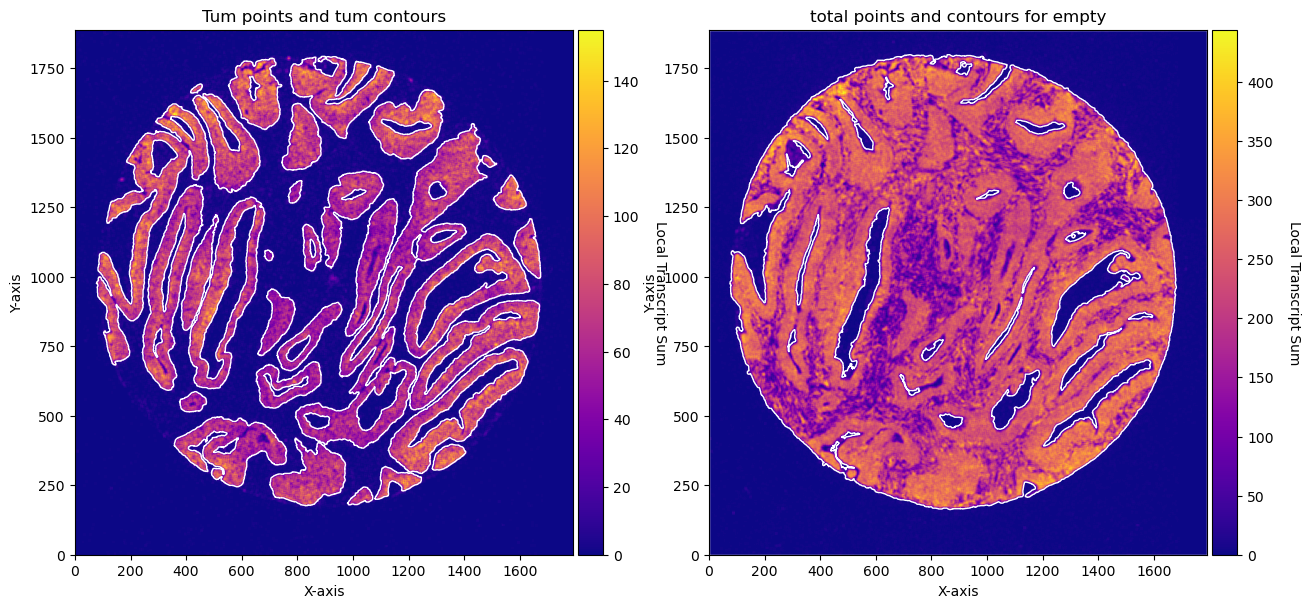

2025-06-12 00:49:31,190 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:49:31,195 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:49:32,451 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/_i/masks_stroma_cancer.png


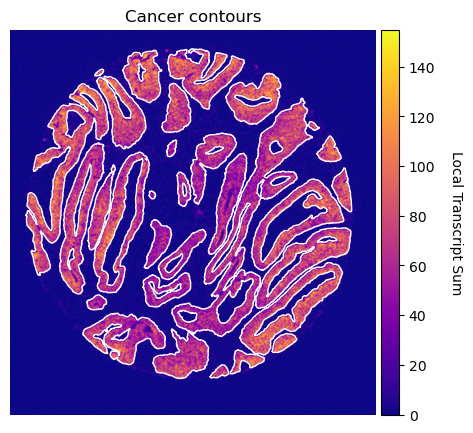

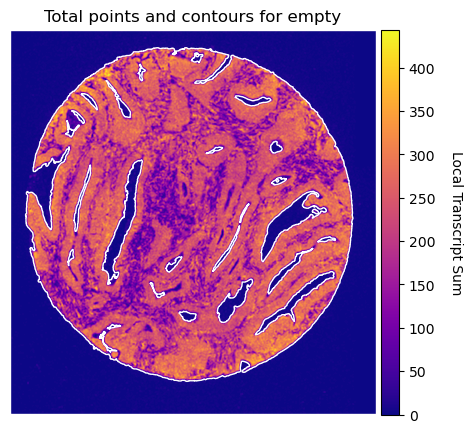

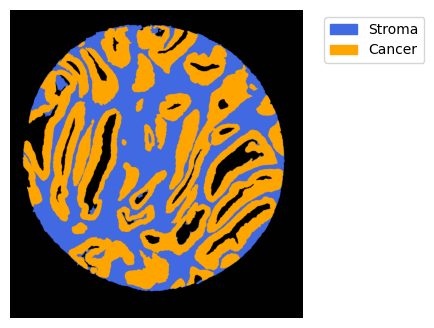

2025-06-12 00:49:32,994 - gridgen.contours.tum - INFO - Initialized GetContour
2025-06-12 00:49:33,135 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 26
2025-06-12 00:49:33,136 - gridgen.contours.empty - INFO - Initialized GetContour


get_conv_sum took 0.0792 seconds
contours_from_sum took 0.0617 seconds
get_conv_sum took 0.6823 seconds


2025-06-12 00:49:34,500 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 29


contours_from_sum took 0.6814 seconds


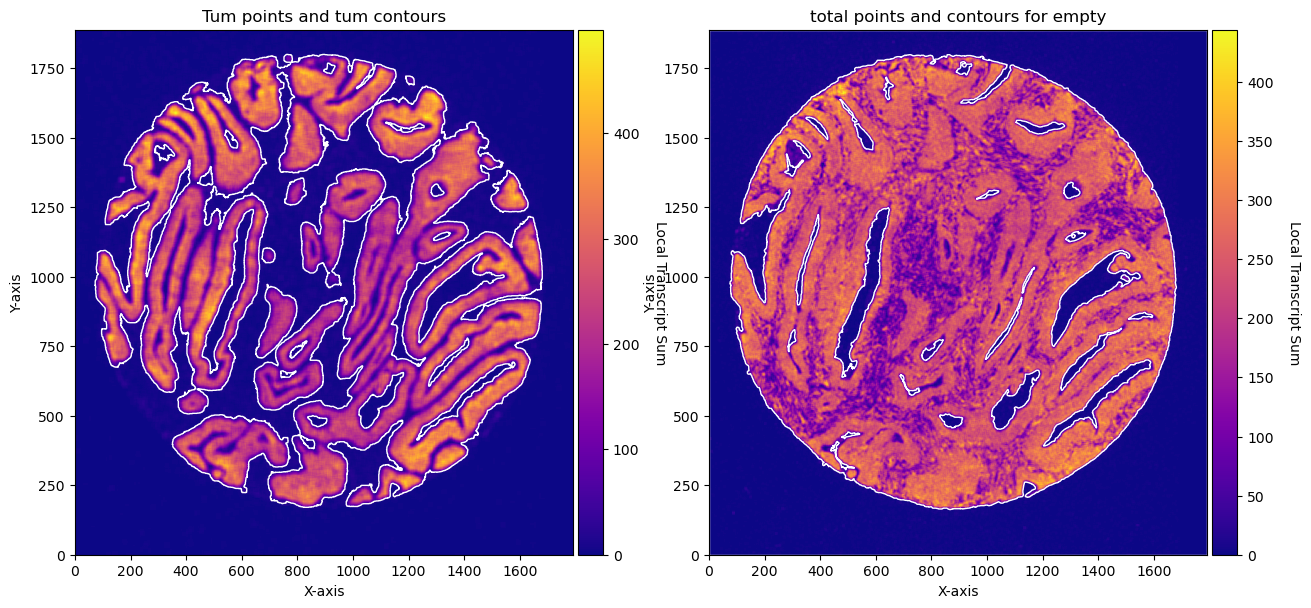

2025-06-12 00:49:36,158 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:49:36,162 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:49:37,372 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/_ii/masks_stroma_cancer.png


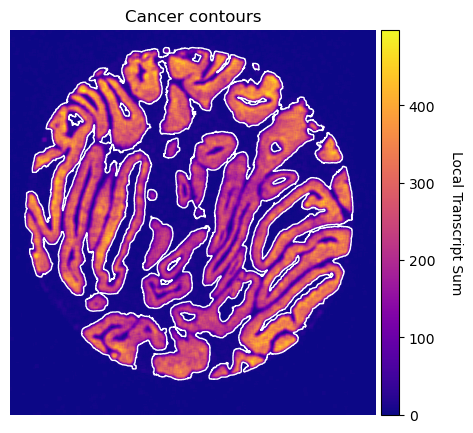

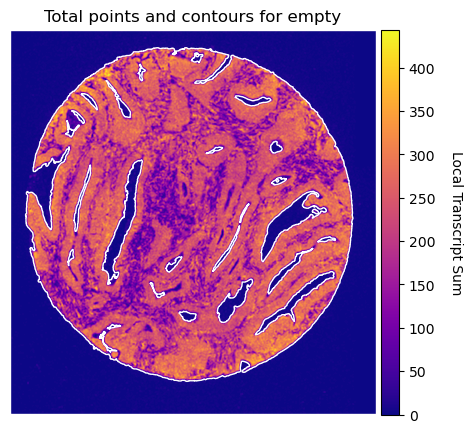

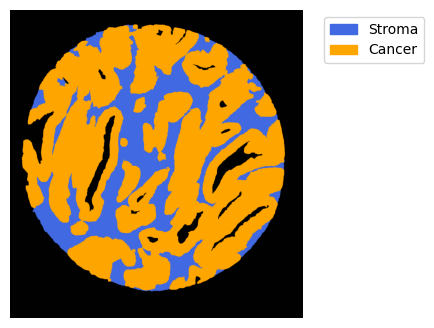

2025-06-12 00:49:37,910 - gridgen.contours.tum - INFO - Initialized GetContour
2025-06-12 00:49:38,062 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 21
2025-06-12 00:49:38,063 - gridgen.contours.empty - INFO - Initialized GetContour


get_conv_sum took 0.0854 seconds
contours_from_sum took 0.0667 seconds
get_conv_sum took 0.7069 seconds


2025-06-12 00:49:39,431 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 29


contours_from_sum took 0.6612 seconds


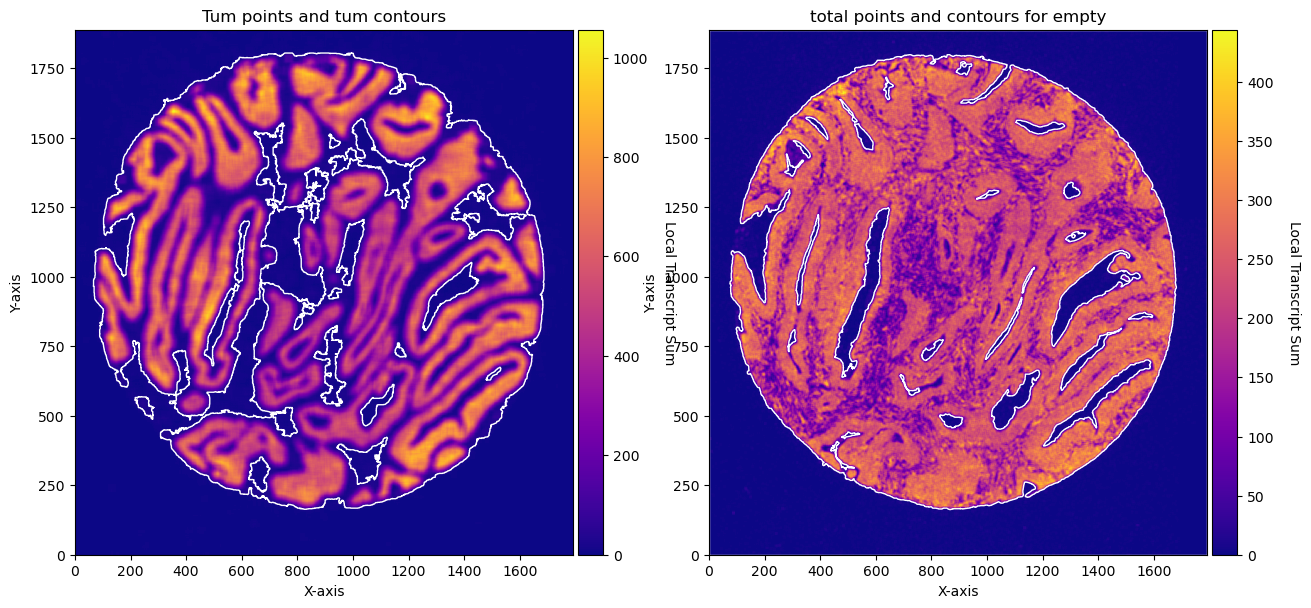

2025-06-12 00:49:41,215 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:49:41,219 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:49:42,419 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/_iii/masks_stroma_cancer.png


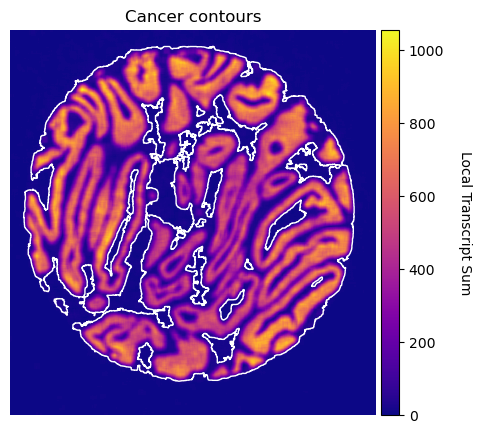

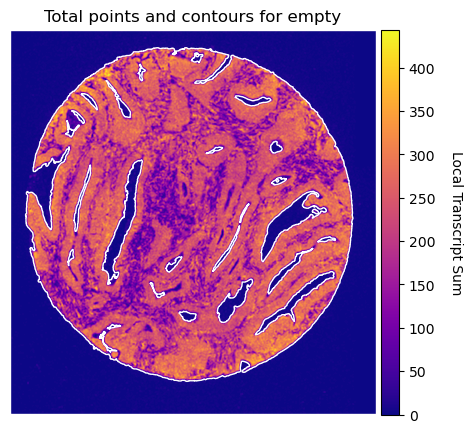

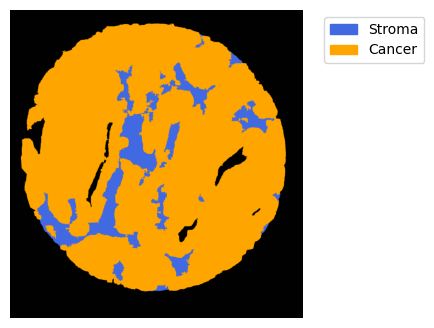

2025-06-12 00:49:42,963 - gridgen.contours.tum - INFO - Initialized GetContour
2025-06-12 00:49:43,128 - gridgen.contours.tum - INFO - Number of contours after filtering no counts: 57
2025-06-12 00:49:43,129 - gridgen.contours.empty - INFO - Initialized GetContour


get_conv_sum took 0.0824 seconds
contours_from_sum took 0.0830 seconds
get_conv_sum took 0.7013 seconds


2025-06-12 00:49:44,508 - gridgen.contours.empty - INFO - Number of contours after filtering no counts: 29


contours_from_sum took 0.6785 seconds


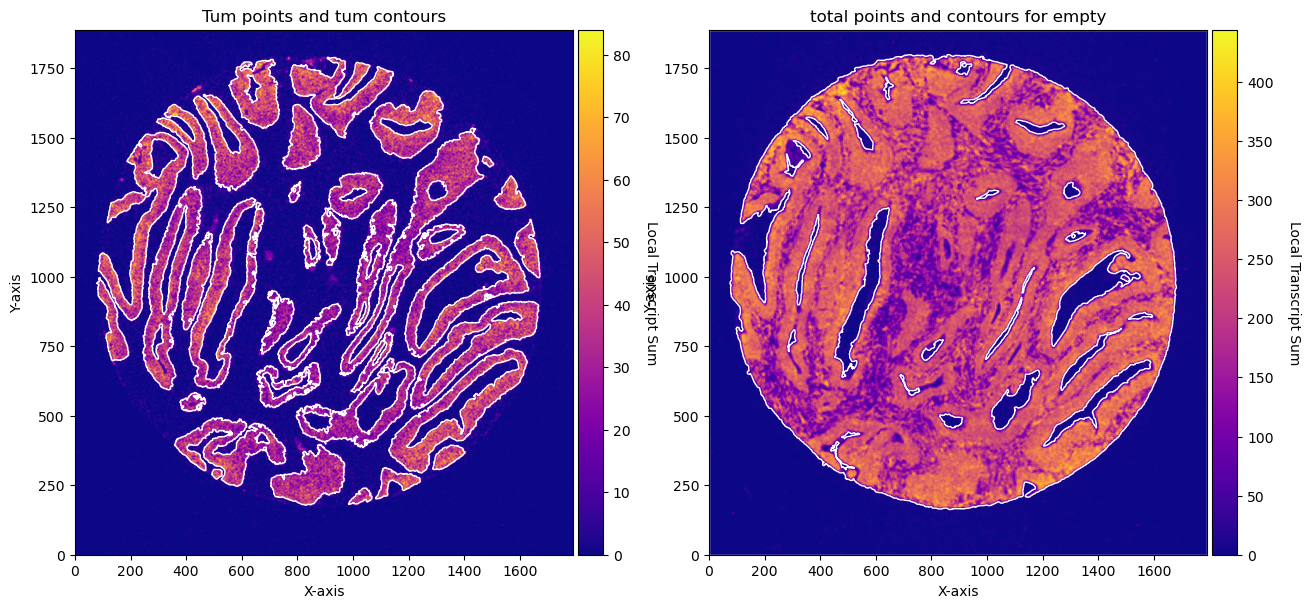

2025-06-12 00:49:46,133 - gridgen.get_masks.GetMasks - INFO - Initialized GetMasks
2025-06-12 00:49:46,138 - gridgen.get_masks.GetMasks - INFO - Subtracted masks from base mask.
2025-06-12 00:49:47,416 - gridgen.get_masks.GetMasks - INFO - Plot saved at results/kernel/_iv/masks_stroma_cancer.png


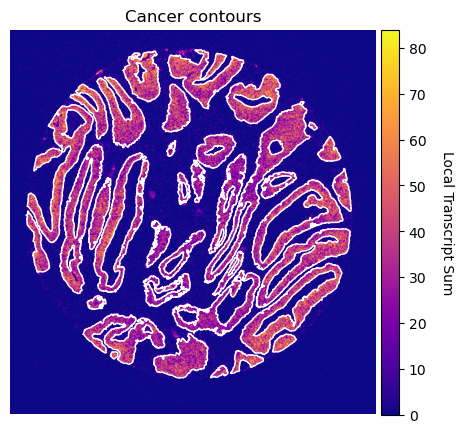

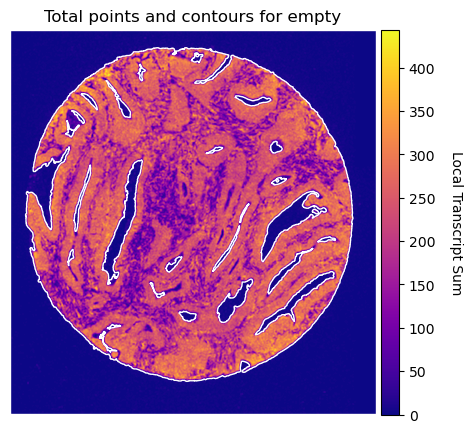

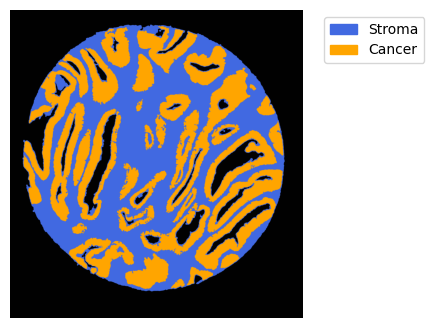

In [14]:

for name, i in parameters.items():
    density_th_tum = i['density_th_tum']
    kernel_size_tum = i['kernel_size_tum']
    density_th_empty = i['density_th_empty']
    kernel_size_empty = i['kernel_size_empty']
    
    
    # obtain contours 
    CTum = contours.ConvolutionContours(array_subset_tum, contour_name='tum')
    CTum.get_conv_sum(kernel_size=kernel_size_tum, kernel_shape='square')
    CTum.contours_from_sum(density_threshold = density_th_tum,
                           min_area_threshold = min_area_th_tum , directionality = 'higher')

    CEmpty = contours.ConvolutionContours(array_total, contour_name='empty')
    CEmpty.get_conv_sum(kernel_size=kernel_size_empty, kernel_shape='square')
    CEmpty.contours_from_sum(density_threshold = density_th_empty,
                           min_area_threshold = min_area_th_empty, directionality = 'lower') # attention that directionality is lower here 

    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    CTum.plot_conv_sum(cmap='plasma', c_countour='white', ax=axs[0])
    axs[0].set_title('Tum points and tum contours')

    CEmpty.plot_conv_sum(cmap='plasma', c_countour='white', ax=axs[1])
    axs[1].set_title('total points and contours for empty')

    plt.show()
        
    # Cancer contours
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    CTum.plot_conv_sum(cmap='plasma', c_countour='white', ax=ax1)
    ax1.set_title('Cancer contours')
    ax1.axis('off')  # hides both x and y axes, ticks, and frame
    fig1.savefig(f'results/kernel/x_cancer_contours{name}.png', dpi=300, bbox_inches='tight')

    # Empty points and contours
    fig2, ax2 = plt.subplots(figsize=(7, 5))
    CEmpty.plot_conv_sum(cmap='plasma', c_countour='white', ax=ax2)
    ax2.set_title('Total points and contours for empty')
    ax2.axis('off')  # hides both x and y axes, ticks, and frame
    fig2.savefig(f'results/kernel/x_empty_contours{name}.png', dpi=300, bbox_inches='tight')


    #### obtain masks
    GM = get_masks.GetMasks(image_shape = (height, width))

    mask_empty = GM.create_mask(CEmpty.contours)
    mask_tum = GM.create_mask(CTum.contours)
    mask_stroma = GM.subtract_masks(np.ones((height, width), dtype=np.uint8), mask_tum, mask_empty)          
    mask_stroma = GM.filter_binary_mask_by_area(mask_stroma, min_area=700)

    GM.plot_masks(masks=[mask_stroma, mask_tum], mask_names=['Stroma', 'Cancer'],
                  background_color=(1, 1, 1), mask_colors={'Stroma': (65, 105, 225), 'Cancer': (255, 165, 0)},
                  path=f'results/kernel/_{name}', show=True, ax=None, figsize=(6, 4))
